In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter

# Load results

In [2]:
def load_data(name):
    results = dict()
    results["K"] = np.load("results/" + name + "/K.npy")

    results["mae_userknn"] = np.load("results/" + name + "/mae_userknn.npy")
    results["mae_pop"] = np.load("results/" + name + "/mae_pop.npy")
    results["mae_gain"] = np.load("results/" + name + "/mae_gain.npy")
    results["mae_userknn_reuse"] = np.load("results/" + name + "/mae_userknn_reuse.npy")
    results["mae_pop_reuse"] = np.load("results/" + name + "/mae_pop_reuse.npy")
    results["mae_gain_reuse"] = np.load("results/" + name + "/mae_gain_reuse.npy")

    results["deg_userknn"] = np.load("results/" + name + "/deg_userknn.npy")
    results["deg_pop"] = np.load("results/" + name + "/deg_pop.npy")
    results["deg_gain"] = np.load("results/" + name + "/deg_gain.npy")
    results["deg_userknn_reuse"] = np.load("results/" + name + "/deg_userknn_reuse.npy")
    results["deg_pop_reuse"] = np.load("results/" + name + "/deg_pop_reuse.npy")
    results["deg_gain_reuse"] = np.load("results/" + name + "/deg_gain_reuse.npy")

    results["skew_userknn"] = np.load("results/" + name + "/skew_userknn.npy")
    results["skew_pop"] = np.load("results/" + name + "/skew_pop.npy")
    results["skew_gain"] = np.load("results/" + name + "/skew_gain.npy")
    results["skew_userknn_reuse"] = np.load("results/" + name + "/skew_userknn_reuse.npy")
    results["skew_pop_reuse"] = np.load("results/" + name + "/skew_pop_reuse.npy")
    results["skew_gain_reuse"] = np.load("results/" + name + "/skew_gain_reuse.npy")
    
    results["gini_userknn"] = np.load("results/" + name + "/gini_userknn.npy")
    results["gini_pop"] = np.load("results/" + name + "/gini_pop.npy")
    results["gini_gain"] = np.load("results/" + name + "/gini_gain.npy")
    results["gini_userknn_reuse"] = np.load("results/" + name + "/gini_userknn_reuse.npy")
    results["gini_pop_reuse"] = np.load("results/" + name + "/gini_pop_reuse.npy")
    results["gini_gain_reuse"] = np.load("results/" + name + "/gini_gain_reuse.npy")
    
    results["hoover_userknn"] = np.load("results/" + name + "/hoover_userknn.npy")
    results["hoover_pop"] = np.load("results/" + name + "/hoover_pop.npy")
    results["hoover_gain"] = np.load("results/" + name + "/hoover_gain.npy")
    results["hoover_userknn_reuse"] = np.load("results/" + name + "/hoover_userknn_reuse.npy")
    results["hoover_pop_reuse"] = np.load("results/" + name + "/hoover_pop_reuse.npy")
    results["hoover_gain_reuse"] = np.load("results/" + name + "/hoover_gain_reuse.npy")
    
    nmentors = pickle.load(open("results/" + name + "/nr_of_mentors.pkl", "rb"))
    results["nmentors_userknn"] = nmentors["UserKNN"]
    results["nmentors_userknn_reuse"] = nmentors["UserKNN + Reuse"]
    results["nmentors_pop"] = nmentors["Popularity"]
    results["nmentors_pop_reuse"] = nmentors["Popularity + Reuse"]
    results["nmentors_gain"] = nmentors["Gain"]
    results["nmentors_gain_reuse"] = nmentors["Gain + Reuse"]
    
    return results

In [3]:
name = "goodreads"
results = load_data("goodreads")

In [4]:
%matplotlib inline

# Plotting
## nr. of neighbors vs. utility

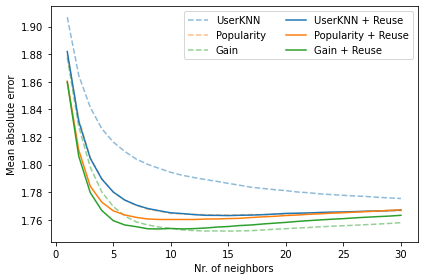

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(results["K"], results["mae_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["K"], results["mae_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["K"], results["mae_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["K"], results["mae_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["K"], results["mae_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["K"], results["mae_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.xlabel("Nr. of neighbors")
plt.ylabel("Mean absolute error")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/k_vs_mae.png", dpi=300)

## nr. of students vs. utility

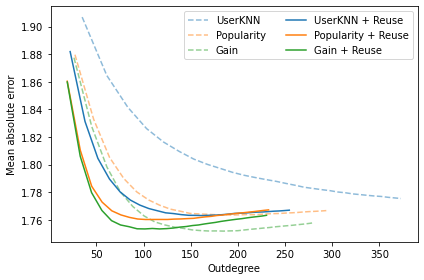

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(results["deg_userknn"], results["mae_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["deg_pop"], results["mae_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["deg_gain"], results["mae_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["deg_userknn_reuse"], results["mae_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["deg_pop_reuse"], results["mae_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["deg_gain_reuse"], results["mae_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.ylabel("Mean absolute error")
plt.xlabel("Outdegree")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/outdegree_vs_mae.png", dpi=300)

## skew coefficient vs. nr. of neighbors

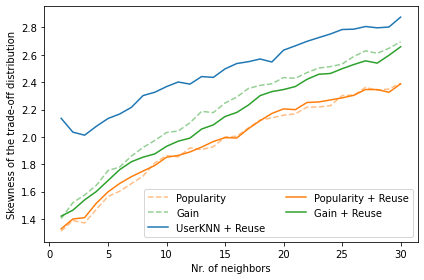

In [7]:
plt.figure(figsize=(6, 4))
#plt.plot(results["K"], results["skew_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["K"], results["skew_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["K"], results["skew_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["K"], results["skew_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["K"], results["skew_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["K"], results["skew_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.ylabel("Skewness of the trade-off distribution")
plt.xlabel("Nr. of neighbors")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/skew_vs_k.png", dpi=300)

# gini index vs. nr. of neighbors

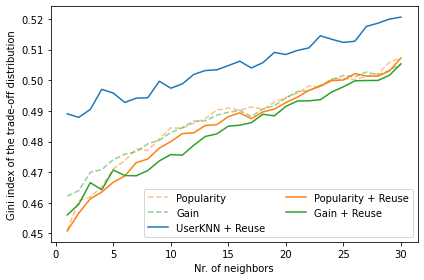

In [8]:
#plt.plot(results["K"], [0] * len(results["K"]), color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["K"], results["gini_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["K"], results["gini_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["K"], results["gini_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["K"], results["gini_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["K"], results["gini_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.ylabel("Gini index of the trade-off distribution")
plt.xlabel("Nr. of neighbors")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/gini_vs_k.png", dpi=300)

# hoover index vs. nr. of neighbors

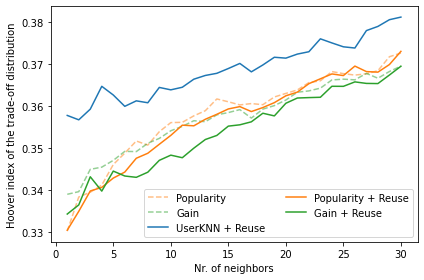

In [9]:
plt.plot(results["K"], results["hoover_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["K"], results["hoover_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["K"], results["hoover_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["K"], results["hoover_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["K"], results["hoover_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.ylabel("Hoover index of the trade-off distribution")
plt.xlabel("Nr. of neighbors")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/hoover_vs_k.png", dpi=300)

## nr. of students vs. utility overall

In [10]:
ml100k_results = load_data("ml-100k")
ml1m_results = load_data("ml-1m")
jester_results = load_data("jester")
goodreads_results = load_data("goodreads")

In [11]:
def plot_acc_deg(ax, results):
    ax.plot(results["deg_userknn"], results["mae_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["deg_pop"], results["mae_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["deg_gain"], results["mae_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["deg_userknn_reuse"], results["mae_userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(results["deg_pop_reuse"], results["mae_pop_reuse"], color="C1", linestyle="solid")
    ax.plot(results["deg_gain_reuse"], results["mae_gain_reuse"], color="C2", linestyle="solid")

def plot_nrmentors(ax, results):
    ax.plot(results["nmentors_userknn"][:100], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["nmentors_pop"][:100], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["nmentors_gain"][:100], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["nmentors_userknn_reuse"][:100], color="C0", linestyle="solid")
    ax.plot(results["nmentors_pop_reuse"][:100], color="C1", linestyle="solid")
    ax.plot(results["nmentors_gain_reuse"][:100], color="C2", linestyle="solid")

In [12]:
%matplotlib qt

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(6, 2))
plot_acc_deg(axes[0], ml100k_results)
plot_acc_deg(axes[1], ml1m_results)
plot_acc_deg(axes[2], jester_results)
plot_acc_deg(axes[3], goodreads_results)
axes[0].set_ylabel(r"$\mathrm{MAE}$")
axes[0].set_xlabel(r"$\mathrm{Exposure}$")
axes[1].set_xlabel(r"$\mathrm{Exposure}$")
axes[2].set_xlabel(r"$\mathrm{Exposure}$")
axes[3].set_xlabel(r"$\mathrm{Exposure}$")
axes[0].set_title("MovieLens 100k")
axes[1].set_title("MovieLens 1M")
axes[2].set_title("Jester")
axes[3].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.8, bottom=0.2, hspace=0.35, wspace=0.25)

fig.align_ylabels(axes)

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(6, 2))
plot_nrmentors(axes[0], ml100k_results)
plot_nrmentors(axes[1], ml1m_results)
plot_nrmentors(axes[2], jester_results)
plot_nrmentors(axes[3], goodreads_results)
axes[0].set_ylabel(r"Nr. of neighbors $N_u$")
axes[0].set_xlabel(r"Nr. of queries $q$")
axes[1].set_xlabel(r"Nr. of queries $q$")
axes[2].set_xlabel(r"Nr. of queries $q$")
axes[3].set_xlabel(r"Nr. of queries $q$")
axes[0].set_title("MovieLens 100k")
axes[1].set_title("MovieLens 1M")
axes[2].set_title("Jester")
axes[3].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.8, bottom=0.2, hspace=0.35, wspace=0.25)

fig.align_ylabels(axes)

## gini vs. nr. of neighbors

In [15]:
ml100k_results = load_data("ml-100k")
ml1m_results = load_data("ml-1m")
jester_results = load_data("jester")
goodreads_results = load_data("goodreads")

In [16]:
def plot_gini_k(ax, results):
    ax.plot(results["K"], results["gini_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.plot(results["K"], results["gini_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.plot(results["K"], results["gini_userknn_reuse"], color="C0", linestyle="solid")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.plot(results["K"], results["gini_pop_reuse"], color="C1", linestyle="solid")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.plot(results["K"], results["gini_gain_reuse"], color="C2", linestyle="solid")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(6, 2))
plot_gini_k(axes[0], ml100k_results)
plot_gini_k(axes[1], ml1m_results)
plot_gini_k(axes[2], jester_results)
plot_gini_k(axes[3], goodreads_results)
axes[0].set_ylabel(r"$\mathrm{Gini}@k$")
axes[0].set_xlabel(r"Nr. of neighbors $k$")
axes[1].set_xlabel(r"Nr. of neighbors $k$")
axes[2].set_xlabel(r"Nr. of neighbors $k$")
axes[3].set_xlabel(r"Nr. of neighbors $k$")
axes[0].set_title("MovieLens 100k")
axes[1].set_title("MovieLens 1M")
axes[2].set_title("Jester")
axes[3].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    if c == "C0":
        lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.0))
        lines.append(Line2D([0], [0], color=c, linestyle="solid"))
    else:
        lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
        lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.8, bottom=0.2, hspace=0.35, wspace=0.25)

fig.align_ylabels(axes)

In [10]:
df = pd.read_csv("data/goodreads/sample.csv", sep=";", names=["user_id", "item_id", "rating"])
df = df.sample(frac=0.8)
df.groupby("user_id").size().std()

443.58200921737136

In [12]:
df.groupby("user_id").size().sort_values()

user_id
470623      12
501121      14
637741      14
779263      14
850896      14
          ... 
208256    3680
193527    4339
271607    5159
422414    5591
145834    6420
Length: 2500, dtype: int64